# Análise de Risco de Crédito
## O objetivo do DataSet em estudo abaixo é fazer uma análise da situação do cliente para definir a viabilidade da realização do empréstimo requisitado

In [1]:
! pip install pandas

  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.0.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached numpy-2.0.1-cp312-cp312-win_amd64.whl (16.3 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)


In [11]:
! pip install matplotlib

  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.0 MB 10.1 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/8.0 MB 11.4 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/8.0 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 11.0 MB/s eta 0:00:00
Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl (189 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl (2.2 MB)
Using cache

In [2]:
import pandas as pd

In [48]:
import matplotlib.pyplot as plt

In [74]:
url = 'datasets/credit_risk_dataset.csv'
df = pd.read_csv(url)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### Traduzindo o DataFrame

In [75]:
df.rename(columns={'person_age': 'Idade'},inplace=True)
df.rename(columns={'person_income': 'Renda'},inplace=True)
df.rename(columns={'person_home_ownership': 'Proprietário'},inplace=True)
df.rename(columns={'person_emp_length': 'Tempo no Emprego'},inplace=True)
df.rename(columns={'loan_intent': 'Finalidade do Empréstimo'},inplace=True)
df.rename(columns={'loan_grade': 'Grau de Empréstimo'},inplace=True)
df.rename(columns={'loan_amnt': 'Quantia Empréstimo'},inplace=True)
df.rename(columns={'loan_int_rate': 'Taxa de Juros do Empréstimo'},inplace=True)
df.rename(columns={'loan_status': 'Situação do Empréstimo'},inplace=True)
df.rename(columns={'loan_percent_income': 'Rendimento Percentual do Empréstimo'},inplace=True)
df.rename(columns={'cb_person_default_on_file': 'Inadimplência Histórica'},inplace=True)
df.rename(columns={'cb_person_cred_hist_length': 'Comprimento do Histórico de Crédito'},inplace=True)

In [76]:
traducao = {
    'RENT': 'ALUGUEL',
    'OWN' : 'PRÓPRIA',
    'MORTGAGE' : 'HIPOTECA',
    'PERSONAL' : 'PESSOAL',
    'EDUCATION' : 'EDUCAÇÃO',
    'MEDICAL' : 'MÉDICA',
    'HOMEIMPROVEMENT': 'REFORMA',
    'OTHER' : 'OUTRO',
    'Y' : 'S',
}

df.replace(traducao, inplace=True)

In [52]:
df

,Idade,Renda,Proprietário,Tempo no Emprego,Finalidade do Empréstimo,Grau de Empréstimo,Quantia Empréstimo,Taxa de Juros do Empréstimo,Situação do Empréstimo,Rendimento Percentual do Empréstimo,Inadimplência Histórica,Comprimento do Histórico de Crédito
0,22,59000,ALUGUEL,123.0,PESSOAL,D,35000,16.02,1,0.59,S,3
1,21,9600,PRÓPRIA,5.0,EDUCAÇÃO,B,1000,11.14,0,0.10,N,2
2,25,9600,HIPOTECA,1.0,MÉDICA,C,5500,12.87,1,0.57,N,3
3,23,65500,ALUGUEL,4.0,MÉDICA,C,35000,15.23,1,0.53,N,2
4,24,54400,ALUGUEL,8.0,MÉDICA,C,35000,14.27,1,0.55,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,HIPOTECA,1.0,PESSOAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,HIPOTECA,4.0,PESSOAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,ALUGUEL,3.0,REFORMA,B,35000,10.99,1,0.46,N,28
32579,56,150000,HIPOTECA,5.0,PESSOAL,B,15000,11.48,0,0.10,N,26


In [82]:
for idade in df['Idade']:
    if idade < 18:
        print('Menor de Idade!')

# Análise Exploratória

## Variáveis Qualitativas:
### Nominais:
- Proprietário
- Finalidade do Empréstimo
- Inadimplêmcia Histórica

### Ordinais:
- Grau de Empréstimo

## Variáveis Quantitativas:
### Discretas:
- Idade
- Situação do Empréstimo
- Comprimento do Histórico de Crédito

### Contínuas:
- Renda Anual
- Tempo no Emprego
- Quantia Empréstimo
- Taxa de Juros do Empréstimo
- Rendimento Percentual do Empréstimo

# Pesquisa

## 1 - Quartis
- O que é?
Quartis são valores que dividem um conjunto de dados ordenados em quatro partes iguais. Eles são:

- Primeiro quartil (Q1): o valor que separa os 25% inferiores dos dados.
- Segundo quartil (Q2): a mediana.
- Terceiro quartil (Q3): o valor que separa os 25% superiores dos dados.
- Para que serve?
Servem para fornecer uma visão detalhada da distribuição dos dados, especialmente sobre a dispersão e a presença de outliers.

## 2 - Percentil
- O que é? É uma medida estatística que indica o valor abaixo do qual uma certa porcentagem de observações em um conjunto de dados se situa. Em outras palavras, o percentil de um dado valor é a percentagem de valores no conjunto de dados que estão abaixo dele.

- Para que serve?
O percentil serve para avaliar a posição relativa de um valor dentro de um conjunto de dados. Ele é útil para entender como um valor se compara com os outros valores do conjunto. Percentis são amplamente utilizados em áreas como educação, saúde e ciências sociais para interpretar resultados de testes, crescimento, e outras métricas.

## 3 - Média
- O que é?
A média é uma medida de tendência central que representa a soma de um conjunto de valores dividida pelo número total de valores. É frequentemente referida como a média aritmética.

- Para que serve?
Serve para fornecer uma ideia geral do "valor central" de um conjunto de dados. É usada para resumir dados e facilitar comparações entre diferentes conjuntos de dados.

## 4 - Mediana
 - O que é?
A mediana é o valor que separa um conjunto de dados ordenados ao meio. Se o número de observações for ímpar, é o valor central; se for par, é a média dos dois valores centrais.

 - Para que serve?
Serve para identificar o ponto médio de um conjunto de dados, especialmente útil em distribuições assimétricas, pois não é afetada por valores extremos.

# Quais pessoa ganham mais

In [34]:
df['Renda'].max()

np.int64(6000000)

In [32]:
df[['Renda']][df.Renda == df['Renda'].max()]

,Renda
32297,6000000


# Quais pessoa ganham menos

In [35]:
df['Renda'].min()

np.int64(4000)

In [33]:
df[['Renda']][df.Renda == df['Renda'].min()]

,Renda
31930,4000


# Quais pessoas apresentam mais risco de crédito

In [47]:
df.rename(columns={'Inadimplência Histórica': 'Inadimplência_Histórica'},inplace=True)
result = df[['Inadimplência_Histórica']][df.Inadimplência_Histórica == 'S']
df.rename(columns={'Inadimplência_Histórica': 'Inadimplência Histórica'},inplace=True)
print(result)

      Inadimplência_Histórica
0                           S
4                           S
21                          S
24                          S
26                          S
...                       ...
32552                       S
32555                       S
32563                       S
32568                       S
32574                       S

[5745 rows x 1 columns]


# Gráfico

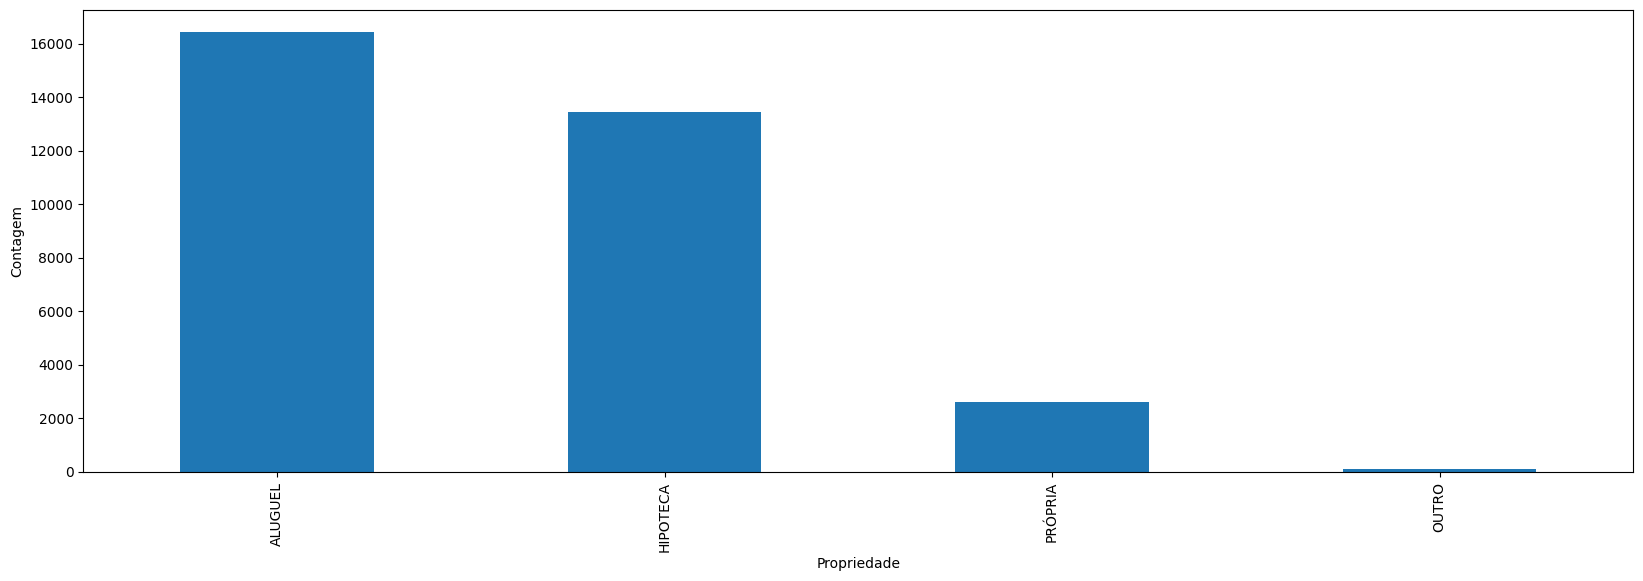

In [79]:
df['Proprietário'].value_counts().plot(kind='bar',figsize=(20,6))

plt.xlabel('Propriedade')
plt.ylabel('Contagem')

plt.show()